In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'x-large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'axes.titlesize': 'x-large',
          'legend.fontsize': 'x-large',
          #'font.size': 16,
          'axes.titlesize': 'x-large',
          'figure.titlesize': 'x-large',}
pylab.rcParams.update(params)

In [28]:
df_ppod = pd.read_csv(r'20 bin PPO 500 results\KPIs.csv',
                          index_col=0,
                          header=0)
df_ppoc = pd.read_csv(r'Karla\3-26-5 PPOc Karla results\KPIs.csv',
                          index_col=0,
                          header=0)
df_sac = pd.read_csv(r'default SAC 500 norm space results\KPIs.csv',
                          index_col=0,
                          header=0)


In [29]:
df_sac = df_sac[df_ppoc.columns]

In [30]:
df_ppod = df_ppod[['baseline','untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps']]

In [31]:
df_regret = pd.concat([df_sac.diff(axis='columns').dropna(axis='columns'),df_ppoc.diff(axis='columns').dropna(axis='columns'), df_ppod.diff(axis='columns').dropna(axis='columns')], 
          axis='columns',
          )
df_regret.columns = ['SAC', 'Continuous_PPO','Discrete_PPO']

In [32]:
kpi_to_plot = ['cost_total',
               'daily_peak_average',
               'electricity_consumption_total',
               'ramping_average',]

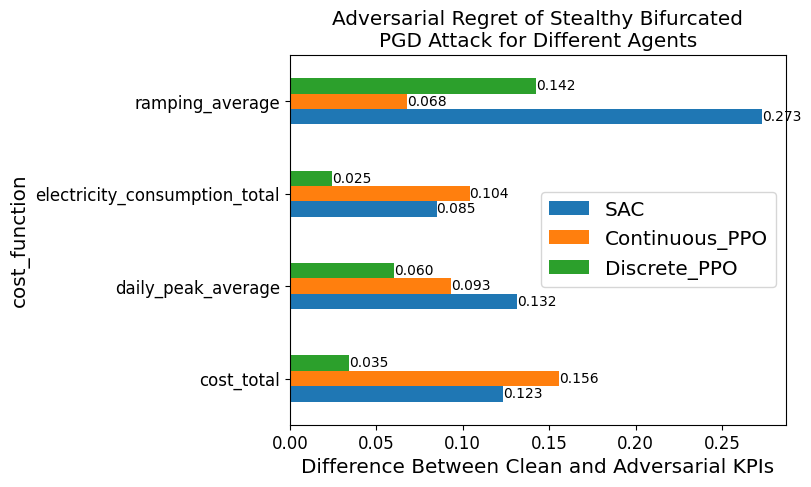

In [36]:
ax = df_regret.loc[kpi_to_plot].plot.barh(title='Adversarial Regret of Stealthy Bifurcated\nPGD Attack for Different Agents',
                                          )
ax.set_xlabel('Difference Between Clean and Adversarial KPIs')
#plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container,fmt='%.3f')